In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/kc_house_data.csv.zip')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020.0,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13808,9542830210,20150211T000000,300000.0,4,2.25,1660,3200,2.0,0,0,...,7,1660.0,0,2011,0,98038,47.3666,-122.019,1960,3558
12615,2070100040,20141201T000000,467000.0,3,1.75,2660,5511,1.0,0,0,...,8,1330.0,1330,1948,0,98108,47.5575,-122.300,2030,6111
9148,3395300180,20140812T000000,534950.0,3,2.25,2130,12286,2.0,0,0,...,8,2130.0,0,1977,0,98052,47.6471,-122.114,2130,10158
11697,6899990200,20140702T000000,720000.0,4,3.00,3550,12327,1.5,0,0,...,10,2180.0,1370,1990,0,98011,47.7533,-122.205,3170,12937
6880,3889100029,20140617T000000,810000.0,3,2.50,2670,10481,2.0,0,0,...,9,2670.0,0,2003,0,98033,47.6673,-122.176,2620,8895
8606,2422059015,20140808T000000,533050.0,2,1.00,910,295772,1.0,0,0,...,5,910.0,0,1953,0,98042,47.3752,-122.110,2050,48351
16326,5557800010,20140623T000000,261350.0,3,1.75,1390,18200,1.0,0,0,...,7,1390.0,0,1962,0,98023,47.3208,-122.337,1810,9675
16075,9268200285,20140703T000000,370000.0,2,1.00,860,5040,1.0,0,0,...,7,860.0,0,1956,0,98117,47.6977,-122.365,1570,5040
8544,3523069047,20140825T000000,849000.0,4,2.75,4010,87555,2.0,0,0,...,10,4010.0,0,2004,0,98038,47.4299,-121.998,2451,209523
17486,6046401300,20140609T000000,428000.0,3,2.00,1310,2550,1.0,0,0,...,7,780.0,530,1986,0,98103,47.6911,-122.350,1460,5100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [9]:
n_rows, n_columns = df.shape
print("Number of rows = ", n_rows)
print("Number of columns = ", n_columns)

Number of rows =  21613
Number of columns =  21


In [15]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
df.duplicated().sum()

0

In [17]:
features = ['sqft_living', 'bedrooms', 'bathrooms']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:

model = LinearRegression()

model.fit(X_train, y_train)


predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error: ", mse)

Mean Squared Error:  74237634953.1832


In [19]:

new_data = pd.DataFrame({'sqft_living': [1500], 'bedrooms': [3], 'bathrooms': [2]})
predicted_price = model.predict(new_data)
print("Predicted Prince: ", predicted_price[0])

Predicted Prince:  381826.6681755521


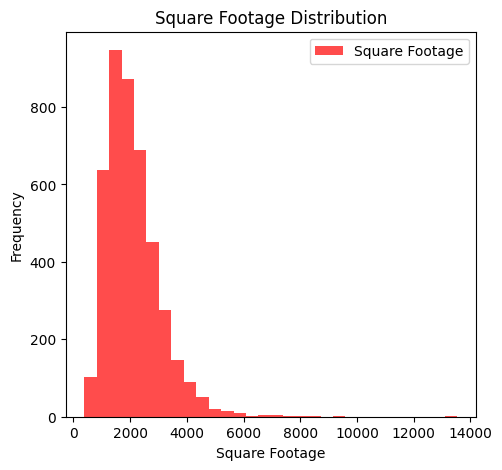

In [20]:
plt.figure(figsize=(18,5))

#visualizing histograms for square footage
plt.subplot(1,3,1)
plt.hist(X_test['sqft_living'],bins = 30, color = 'red', alpha = 0.7, label = 'Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.title('Square Footage Distribution')
plt.legend()

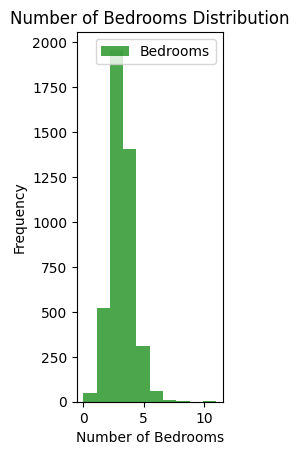

In [21]:
plt.subplot(1, 3, 2)
plt.hist(X_test['bedrooms'], bins=10, color='Green', alpha=0.7, label='Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Number of Bedrooms Distribution')
plt.legend()

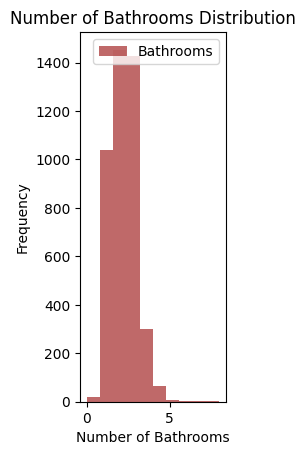

In [22]:
plt.subplot(1, 3, 3)
plt.hist(X_test['bathrooms'], bins=10, color='brown', alpha=0.7, label='Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Number of Bathrooms Distribution')
plt.legend()

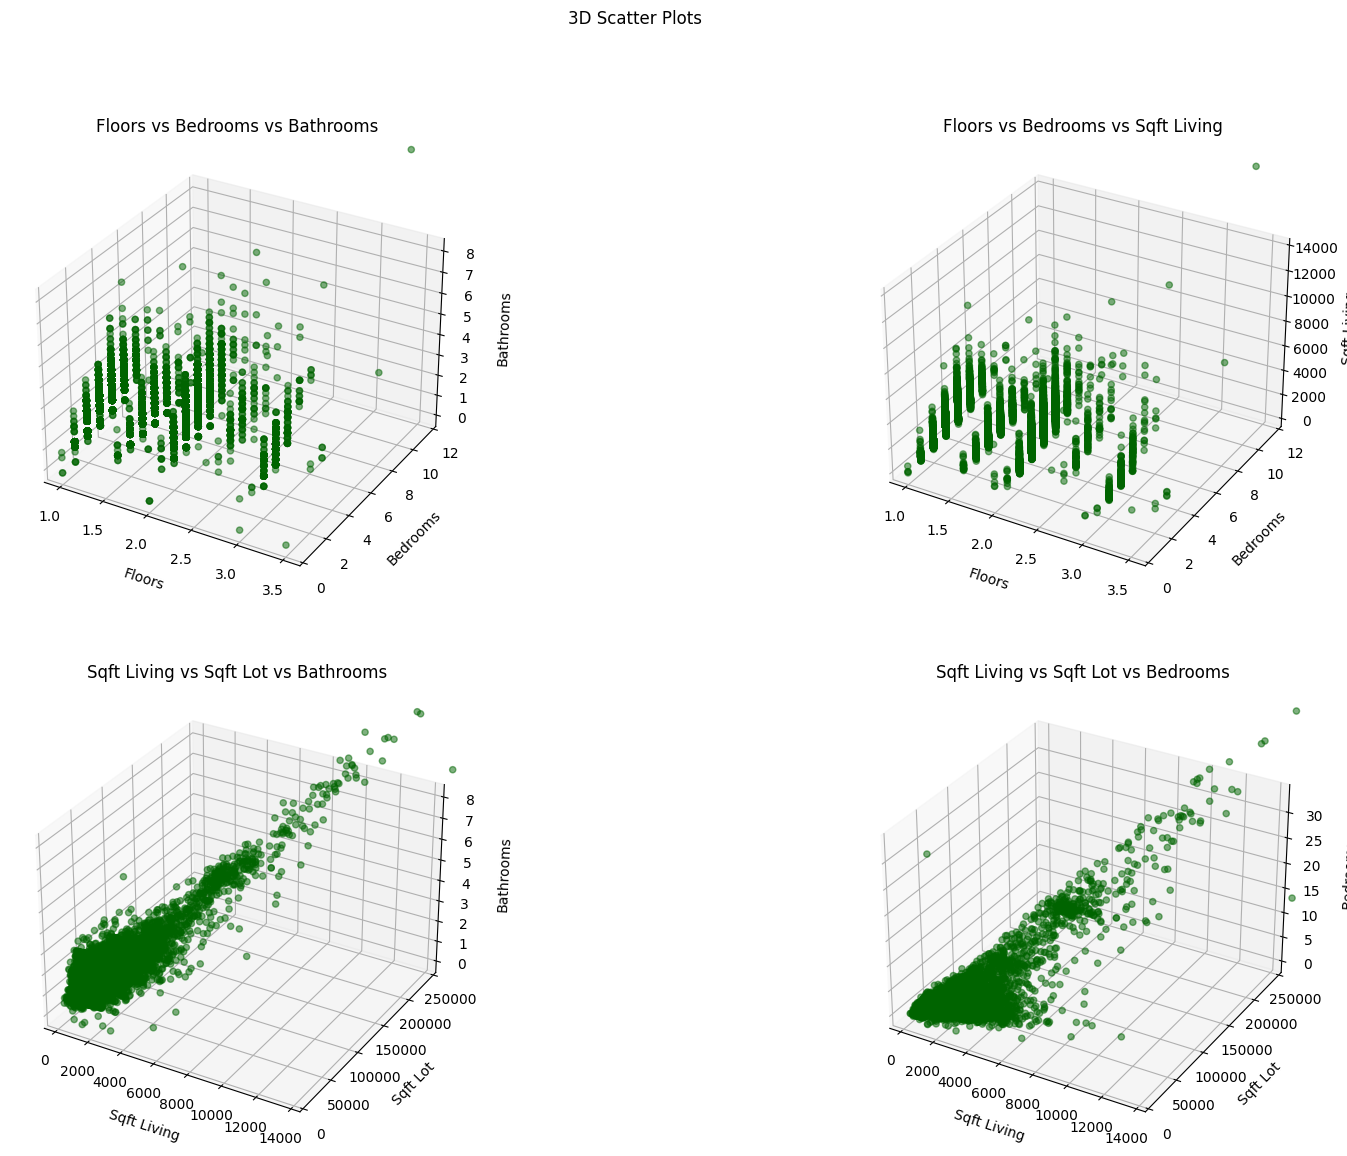

In [23]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=('Floors vs Bedrooms vs Bathrooms',
                    'Floors vs Bedrooms vs Sqft Living',
                    'Sqft Living vs Sqft Lot vs Bathrooms',
                    'Sqft Living vs Sqft Lot vs Bedrooms')
)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 13))

# First 3D scatter plot
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.scatter(df['floors'], df['bedrooms'], df['bathrooms'], c='darkgreen', alpha=0.5)
ax1.set_xlabel('\nFloors')
ax1.set_ylabel('\nBedrooms')
ax1.set_zlabel('\nBathrooms')
ax1.set_ylim([0, 12])
ax1.set_title('Floors vs Bedrooms vs Bathrooms')

# Second 3D scatter plot
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.scatter(df['floors'], df['bedrooms'], df['sqft_living'], c='darkgreen', alpha=0.5)
ax2.set_xlabel('\nFloors')
ax2.set_ylabel('\nBedrooms')
ax2.set_zlabel('\nSqft Living')
ax2.set_ylim([0, 12])
ax2.set_title('Floors vs Bedrooms vs Sqft Living')

# Third 3D scatter plot
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(df['sqft_living'], df['sqft_lot'], df['bathrooms'], c='darkgreen', alpha=0.5)
ax3.set_xlabel('\nSqft Living')
ax3.set_ylabel('\nSqft Lot')
ax3.set_zlabel('\nBathrooms')
ax3.set_ylim([0, 250000])
ax3.set_title('Sqft Living vs Sqft Lot vs Bathrooms')

# Fourth 3D scatter plot
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(df['sqft_living'], df['sqft_lot'], df['bedrooms'], c='darkgreen', alpha=0.5)
ax4.set_xlabel('\nSqft Living')
ax4.set_ylabel('\nSqft Lot')
ax4.set_zlabel('\nBedrooms')
ax4.set_ylim([0, 250000])
ax4.set_title('Sqft Living vs Sqft Lot vs Bedrooms')

plt.suptitle('3D Scatter Plots')
plt.show()


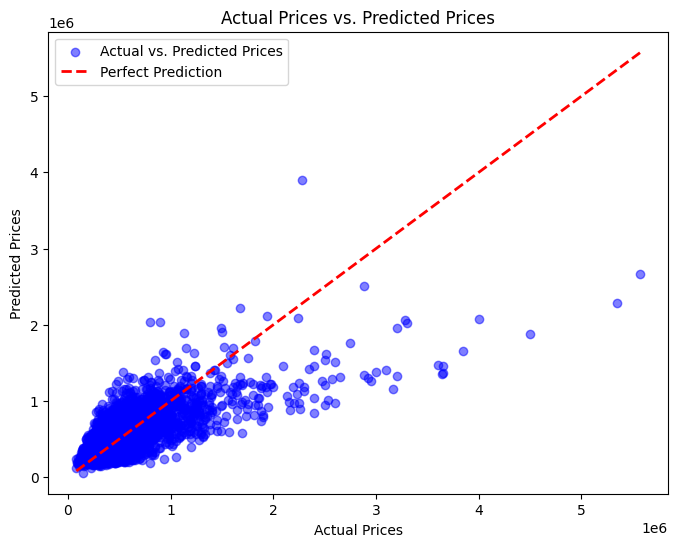

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5, label='Actual vs. Predicted Prices')

# Add the line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

# Update the layout with axis labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [25]:
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)


Coefficients: [   305.64613097 -56373.55481765  11296.92029198]
Intercept: 69884.2955837939


In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# R-squared score
r2 = r2_score(y_test, predictions)
print('R-squared:', r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

R-squared: 0.5089347172264876
Mean Absolute Error: 174662.93438524107
Root Mean Squared Error: 272465.84180991055
